In [26]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [27]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
np.random.seed(1)

In [33]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


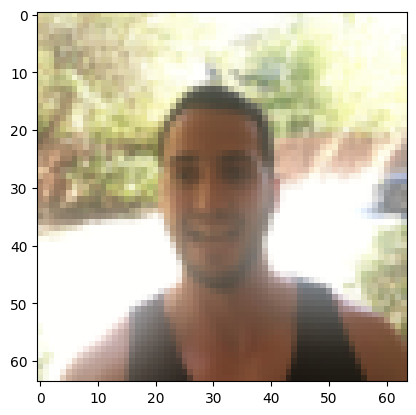

In [34]:
index = 50
plt.imshow(X_train_orig[index])
plt.show()

In [35]:
def happyModel():

    model = tf.keras.Sequential([

            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            tfl.Conv2D(32, (7,7)),
            tfl.BatchNormalization(axis=-1),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1, activation='sigmoid')

        ])

    return model

In [36]:
happy_model = happyModel()

In [37]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [38]:
happy_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                      

In [39]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 9ms/step - loss: 0.8396 - accuracy: 0.7817
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.3440 - accuracy: 0.8683
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.3498 - accuracy: 0.8833
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8650
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1759 - accuracy: 0.9450
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9733
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9483
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.9733
Epoch 10/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9683


In [40]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.2928 - accuracy: 0.8867


[0.29283255338668823, 0.8866666555404663]